In [1]:
import os
os.chdir('/root/evaluate-saliency-4/jigsaw')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dict_keys([1, 'modelname', 'refs', 'target_ids'])
(1, 3, 224, 224)
torch.Size([224, 224])


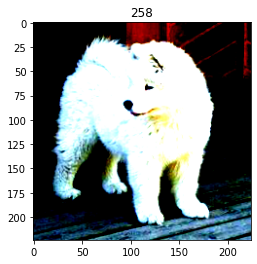

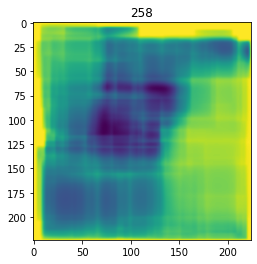

In [14]:
from benchmark import settings
from matplotlib import pyplot as plt
import glob
tensor_to_numpy = lambda t:t.detach().cpu().numpy()
def load(impath=None,modelname='vgg19',sanityname='cascade'):
    import pickle
    impath = impath.rstrip(os.path.sep)
    impath = os.path.basename(impath)
    imroot = impath.split('.') # remove extension
    imroot = imroot[0] 
#     assert imroot == 'samoyed1'
    # im_save_dir = create_im_save_dir(experiment_name=f'sanity-check-{sanityname}-{modelname}',impath=impath)  
    im_save_dir = os.path.join(settings.RESULTS_DIR,f'sanity-check-{sanityname}-{modelname}',imroot)
    loadnames = glob.glob(os.path.join(im_save_dir,'*.pkl'))
    print(im_save_dir)
    print(loadnames)
    for i,loadname in enumerate(loadnames):
        with open(loadname,'rb') as f:
            loaded = pickle.load(f)
        print(loaded.keys())
        print(loaded['refs'][0].shape)
#         print(loaded[1][0].shape)
        print(loaded[i][0].shape)
        #=======================================================
        
        plt.figure()
        plt.imshow(np.transpose(loaded['refs'][0][0],(1,2,0)))
        plt.title(loaded['target_ids'][0])
        plt.show()

        plt.figure()
        plt.imshow(loaded[i][0],cmap='hot')
#         plt.imshow(tensor_to_numpy(loaded[1])[0])
        
        plt.title(loaded['target_ids'][0])
        plt.show()
        #=======================================================
        if i == 2:
            break
    # assert False
  # loadname = '/root/evaluate-saliency-4/jigsaw/benchmark/results/sanity-check-cascade-vgg19/samoyed1/1_samoyed258.pkl'
import parameters.parameters4 as P
P.impath = '/root/evaluate-saliency-4/jigsaw/benchmark/results/sanity-check-cascade-vgg16/ILSVRC2012_val_00000001'
load(impath=P.impath,modelname='vgg16',sanityname='cascade')